In [1]:
#basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device("mps")

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head() 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
from ydata_profiling import ProfileReport
report = ProfileReport(train_df)
#report

<Axes: >

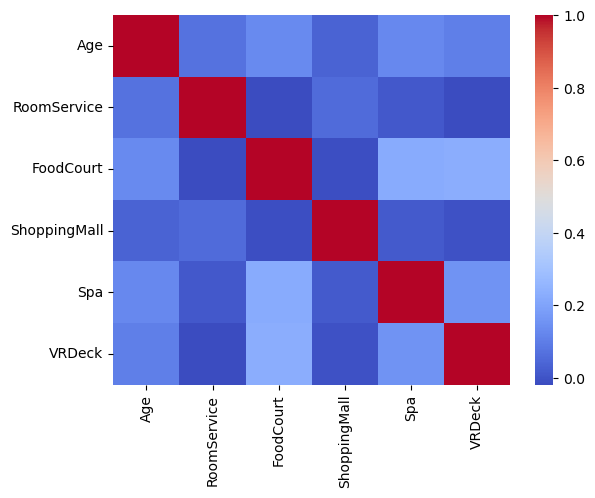

In [9]:
sns.heatmap(train_df.select_dtypes('number').corr(),cmap='coolwarm')

In [10]:
#missing percentage
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(train_df)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Name            2.300702
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64

In [11]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt       2.478373
Spa             2.361468
Cabin           2.338087
ShoppingMall    2.291326
Name            2.197802
CryoSleep       2.174421
VIP             2.174421
Destination     2.151040
Age             2.127660
HomePlanet      2.034136
RoomService     1.917232
VRDeck          1.870470
PassengerId     0.000000
dtype: float64

In [12]:
len(train_df.columns)

14

#### Cryosleep

In [13]:
pd.isna(train_df['CryoSleep']).sum()

217

In [14]:
cat_columns = ['HomePlanet', 'CryoSleep','Destination','VIP','cabin0', 'cabin_last']

In [15]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [16]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

def calculate_cramers_v_for_column(df, target_col, cat_cols):
    return {
        col: cramers_v(df[target_col].dropna(), df[col].dropna())
        for col in cat_cols
        if col in df.columns
    }


In [18]:
train_df['cabin0'] = train_df['Cabin'].apply(lambda x : str(x).split('/')[0])

In [19]:
train_df['cabin0'].value_counts()

cabin0
F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
nan     199
T         5
Name: count, dtype: int64

In [20]:
train_df['cabin_last'] = train_df['Cabin'].apply(lambda x : str(x).split('/')[-1])

In [21]:
train_df['cabin_last'].value_counts()

cabin_last
S      4288
P      4206
nan     199
Name: count, dtype: int64

In [22]:
train_df.drop('Cabin',axis=1,inplace=True)

In [23]:
test_df['cabin0'] = test_df['Cabin'].apply(lambda x : str(x).split('/')[0])

In [24]:
test_df['cabin_last'] = test_df['Cabin'].apply(lambda x : str(x).split('/')[-1])

In [25]:
test_df.drop('Cabin',axis=1,inplace=True)

In [26]:
calculate_cramers_v_for_column(train_df,'CryoSleep',cat_columns)

{'HomePlanet': 0.1185870016644907,
 'CryoSleep': 0.9997434351825434,
 'Destination': 0.12048708822467324,
 'VIP': 0.08057355569595007,
 'cabin0': 0.3319009184824688,
 'cabin_last': 0.03177677229535335}

In [27]:
spend_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['Total_spending'] = 0
test_df['Total_spending'] = 0
for col in spend_col:
    train_df['Total_spending'] = train_df['Total_spending'] + train_df[col].fillna(0)
    test_df['Total_spending'] = test_df['Total_spending'] + test_df[col].fillna(0)

In [28]:
train_df.groupby('CryoSleep').describe()['Total_spending']

,count,mean,std,min,25%,50%,75%,max
CryoSleep,,,,,,,,
False,5439.0,2248.299687,3245.061489,0.0,746.0,1019.0,2416.0,35987.0
True,3037.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
#total spending for cryosleep is zero
def fill_cryo(cols):
    cryo = cols[0]
    total = cols[1]
    if pd.isna(cryo) == True:
        if total == 0:
            return 1
        else:
            return 0
    else:
        return cryo
train_df['CryoSleep'] = train_df[['CryoSleep','Total_spending']].apply(fill_cryo,axis=1)
test_df['CryoSleep'] = test_df[['CryoSleep','Total_spending']].apply(fill_cryo,axis=1)

In [30]:
train_df['CryoSleep'] = train_df['CryoSleep'].apply(lambda x : 0 if x == False else 1)

In [31]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
HomePlanet        4.699556
Name              4.676175
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
RoomService       4.231938
Age               4.185177
PassengerId       0.000000
CryoSleep         0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [32]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
Name              2.197802
VIP               2.174421
Destination       2.151040
Age               2.127660
HomePlanet        2.034136
RoomService       1.917232
VRDeck            1.870470
PassengerId       0.000000
CryoSleep         0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [33]:
train_df['CryoSleep'].value_counts()

CryoSleep
0    5558
1    3135
Name: count, dtype: int64

In [34]:
#homeplanet
train_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [35]:
calculate_cramers_v_for_column(train_df,'HomePlanet',cat_columns)

{'HomePlanet': 1.0,
 'CryoSleep': 0.1180558189771168,
 'Destination': 0.26231801736986216,
 'VIP': 0.177794571254956,
 'cabin0': 0.7441945829669705,
 'cabin_last': 0.03262166539106222}

In [36]:
calculate_cramers_v_for_column(train_df,'cabin0',cat_columns)

{'HomePlanet': 0.7441945829669705,
 'CryoSleep': 0.33114461932761724,
 'Destination': 0.24435220827830434,
 'VIP': 0.19840766962927114,
 'cabin0': 1.0,
 'cabin_last': 0.7078918285534208}

In [37]:
train_df.groupby('HomePlanet')['cabin0'].value_counts()

HomePlanet  cabin0
Earth       G         2498
            F         1614
            E          395
            nan         95
Europa      B          766
            C          734
            A          252
            D          186
            E          128
            nan         61
            T            4
Mars        F         1110
            E          330
            D          282
            nan         37
Name: count, dtype: int64

In [38]:
def fill_home(cols):
    home = cols[0]
    cabin = cols[1]
    if pd.isna(home) == True:
        if cabin in ['G','F']:
            return 'Earth'
        elif cabin in ['B','C','A']:
            return 'Europa'
        elif cabin in ['D','E']:
            return 'Mars'
        else:
            return "Earth"
    else: 
        return home
        

In [39]:
train_df['HomePlanet'] = train_df[['HomePlanet','cabin0']].apply(fill_home,axis=1)
test_df['HomePlanet'] = test_df[['HomePlanet','cabin0']].apply(fill_home,axis=1)

In [40]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
Name              4.676175
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
RoomService       4.231938
Age               4.185177
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [41]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
Name              2.197802
VIP               2.174421
Destination       2.151040
Age               2.127660
RoomService       1.917232
VRDeck            1.870470
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

### Drop name column

In [42]:
train_df.drop('Name',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)

In [43]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
RoomService       4.231938
Age               4.185177
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [44]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
VIP               2.174421
Destination       2.151040
Age               2.127660
RoomService       1.917232
VRDeck            1.870470
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [45]:
#spending patterns
train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()/train_df['Total_spending'].sum()

RoomService     0.152692
FoodCourt       0.311225
ShoppingMall    0.117688
Spa             0.211393
VRDeck          0.207002
dtype: float64

In [46]:
train_df['Total_spending'].isna().sum()

0

In [47]:
#filling RoomService
def fill_room(cols):
    room = cols[0]
    total = cols[1]
    if pd.isna(room) == True:
        return 0.15 * (total + total*0.15)
    else:
        return room
train_df['RoomService'] = train_df[['RoomService','Total_spending']].apply(fill_room,axis=1)
test_df['RoomService'] = test_df[['RoomService','Total_spending']].apply(fill_room,axis=1)

In [48]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

ShoppingMall      4.863222
VIP               4.746318
VRDeck            4.395604
FoodCourt         4.278700
Spa               4.278700
Destination       4.255319
Age               4.185177
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [49]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

FoodCourt         2.478373
Spa               2.361468
ShoppingMall      2.291326
VIP               2.174421
Destination       2.151040
Age               2.127660
VRDeck            1.870470
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [50]:
def fill_shop(cols):
    shop = cols[0]
    total = cols[1]
    if pd.isna(shop) == True:
        return 0.117 * (total + total*0.117)
    else:
        return shop
train_df['ShoppingMall'] = train_df[['ShoppingMall','Total_spending']].apply(fill_shop,axis=1)
test_df['ShoppingMall'] = test_df[['ShoppingMall','Total_spending']].apply(fill_shop,axis=1)

In [51]:
def fill_food(cols):
    food = cols[0]
    total = cols[1]
    if pd.isna(food) == True:
        return 0.311 * (total + total*0.311)
    else:
        return food
train_df['FoodCourt'] = train_df[['FoodCourt','Total_spending']].apply(fill_food,axis=1)
test_df['FoodCourt'] = test_df[['FoodCourt','Total_spending']].apply(fill_food,axis=1)

In [52]:
def fill_spa(cols):
    spa = cols[0]
    total = cols[1]
    if pd.isna(spa) == True:
        return 0.211 * (total + total*0.211)
    else:
        return spa
train_df['Spa'] = train_df[['Spa','Total_spending']].apply(fill_spa,axis=1)
test_df['Spa'] = test_df[['Spa','Total_spending']].apply(fill_spa,axis=1)

In [53]:
def fill_vr(cols):
    vr = cols[0]
    total = cols[1]
    if pd.isna(vr) == True:
        return 0.207 * (total + total*0.207)
    else:
        return vr
train_df['VRDeck'] = train_df[['VRDeck','Total_spending']].apply(fill_vr,axis=1)
test_df['VRDeck'] = test_df[['VRDeck','Total_spending']].apply(fill_vr,axis=1)

In [54]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(train_df)

VIP               2.335212
Destination       2.093639
Age               2.059128
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
FoodCourt         0.000000
ShoppingMall      0.000000
Spa               0.000000
VRDeck            0.000000
Transported       0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [55]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

VIP               2.174421
Destination       2.151040
Age               2.127660
PassengerId       0.000000
HomePlanet        0.000000
CryoSleep         0.000000
RoomService       0.000000
FoodCourt         0.000000
ShoppingMall      0.000000
Spa               0.000000
VRDeck            0.000000
cabin0            0.000000
cabin_last        0.000000
Total_spending    0.000000
dtype: float64

In [56]:
train_df.groupby('VIP')['Total_spending'].describe()

,count,mean,std,min,25%,50%,75%,max
VIP,,,,,,,,
False,8291.0,1371.504644,2683.701966,0.0,0.0,705.0,1369.0,35987.0
True,199.0,4425.477387,5121.300417,0.0,1281.0,2767.0,6120.5,31076.0


In [57]:
def fill_vip(cols):
    vip = cols[0]
    total = cols[1]
    if pd.isna(vip) == True:
        if total > 1371:
            return True
        else:
            return False
    else:
        return vip
train_df['VIP'] = train_df[['VIP','Total_spending']].apply(fill_vip,axis=1)
test_df['VIP'] = test_df[['VIP','Total_spending']].apply(fill_vip,axis=1)

In [58]:
calculate_cramers_v_for_column(train_df,'Destination',cat_columns)

{'HomePlanet': 0.2603698247331967,
 'CryoSleep': 0.11779366835041104,
 'Destination': 1.0,
 'VIP': 0.04308491808222061,
 'cabin0': 0.24435220827830434,
 'cabin_last': 0.015513976300882863}

In [59]:
train_df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [60]:
train_df.groupby('Destination')['Total_spending'].describe()

,count,mean,std,min,25%,50%,75%,max
Destination,,,,,,,,
55 Cancri e,1800.0,2180.285556,4127.763636,0.0,0.0,619.5,2610.25,35987.0
PSO J318.5-22,796.0,572.315327,1161.328235,0.0,0.0,0.0,752.25,18692.0
TRAPPIST-1e,5915.0,1338.339983,2397.881512,0.0,0.0,787.0,1449.00,30478.0


In [61]:
def fill_dest(cols):
    dest = cols[0]
    total = cols[1]
    if pd.isna(dest) == True:
        if total < 796.0:
            return 'PSO J318.5-22'
        elif total in range(796,5815) :
            return '55 Cancri e'
        else:
            return 'TRAPPIST-1e'
    else:
        return dest
train_df['Destination'] = train_df[['Destination','Total_spending']].apply(fill_dest,axis=1)
test_df['Destination'] = test_df[['Destination','Total_spending']].apply(fill_dest,axis=1)

In [62]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [63]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [64]:
(train_df.isnull().sum().sort_values(ascending=False)*100)/len(train_df)

PassengerId       0.0
HomePlanet        0.0
CryoSleep         0.0
Destination       0.0
Age               0.0
VIP               0.0
RoomService       0.0
FoodCourt         0.0
ShoppingMall      0.0
Spa               0.0
VRDeck            0.0
Transported       0.0
cabin0            0.0
cabin_last        0.0
Total_spending    0.0
dtype: float64

In [65]:
(test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df)

PassengerId       0.0
HomePlanet        0.0
CryoSleep         0.0
Destination       0.0
Age               0.0
VIP               0.0
RoomService       0.0
FoodCourt         0.0
ShoppingMall      0.0
Spa               0.0
VRDeck            0.0
cabin0            0.0
cabin_last        0.0
Total_spending    0.0
dtype: float64

In [66]:
#updating total spending
spend_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['Total_spending'] = 0
test_df['Total_spending'] = 0
for col in spend_col:
    train_df['Total_spending'] = train_df['Total_spending'] + train_df[col].fillna(0)
    test_df['Total_spending'] = test_df['Total_spending'] + test_df[col].fillna(0)

In [67]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin0,cabin_last,Total_spending
0,0001_01,Europa,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0


In [68]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin0,cabin_last,Total_spending
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S,645.0


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8693 non-null   object 
 2   CryoSleep       8693 non-null   int64  
 3   Destination     8693 non-null   object 
 4   Age             8693 non-null   float64
 5   VIP             8693 non-null   bool   
 6   RoomService     8693 non-null   float64
 7   FoodCourt       8693 non-null   float64
 8   ShoppingMall    8693 non-null   float64
 9   Spa             8693 non-null   float64
 10  VRDeck          8693 non-null   float64
 11  Transported     8693 non-null   bool   
 12  cabin0          8693 non-null   object 
 13  cabin_last      8693 non-null   object 
 14  Total_spending  8693 non-null   float64
dtypes: bool(2), float64(7), int64(1), object(5)
memory usage: 900.0+ KB


In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     4277 non-null   object 
 1   HomePlanet      4277 non-null   object 
 2   CryoSleep       4277 non-null   object 
 3   Destination     4277 non-null   object 
 4   Age             4277 non-null   float64
 5   VIP             4277 non-null   bool   
 6   RoomService     4277 non-null   float64
 7   FoodCourt       4277 non-null   float64
 8   ShoppingMall    4277 non-null   float64
 9   Spa             4277 non-null   float64
 10  VRDeck          4277 non-null   float64
 11  cabin0          4277 non-null   object 
 12  cabin_last      4277 non-null   object 
 13  Total_spending  4277 non-null   float64
dtypes: bool(1), float64(7), object(6)
memory usage: 438.7+ KB


In [71]:
cat_cols = ['HomePlanet','CryoSleep','Destination','VIP','cabin0','cabin_last']
cont_cols = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Total_spending']
y_col = ['Transported']

In [72]:
for col in cat_cols:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     8693 non-null   object  
 1   HomePlanet      8693 non-null   category
 2   CryoSleep       8693 non-null   category
 3   Destination     8693 non-null   category
 4   Age             8693 non-null   float64 
 5   VIP             8693 non-null   category
 6   RoomService     8693 non-null   float64 
 7   FoodCourt       8693 non-null   float64 
 8   ShoppingMall    8693 non-null   float64 
 9   Spa             8693 non-null   float64 
 10  VRDeck          8693 non-null   float64 
 11  Transported     8693 non-null   bool    
 12  cabin0          8693 non-null   category
 13  cabin_last      8693 non-null   category
 14  Total_spending  8693 non-null   float64 
dtypes: bool(1), category(6), float64(7), object(1)
memory usage: 603.8+ KB


In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     4277 non-null   object  
 1   HomePlanet      4277 non-null   category
 2   CryoSleep       4277 non-null   category
 3   Destination     4277 non-null   category
 4   Age             4277 non-null   float64 
 5   VIP             4277 non-null   category
 6   RoomService     4277 non-null   float64 
 7   FoodCourt       4277 non-null   float64 
 8   ShoppingMall    4277 non-null   float64 
 9   Spa             4277 non-null   float64 
 10  VRDeck          4277 non-null   float64 
 11  cabin0          4277 non-null   category
 12  cabin_last      4277 non-null   category
 13  Total_spending  4277 non-null   float64 
dtypes: category(6), float64(7), object(1)
memory usage: 293.4+ KB


In [75]:
cat_train = np.stack([train_df[col].cat.codes for col in cat_cols],axis=1)
cat_test = np.stack([test_df[col].cat.codes for col in cat_cols],axis=1)

In [76]:
cat_train = torch.LongTensor(cat_train).to(device)
cat_test = torch.LongTensor(cat_test).to(device)

In [77]:
cont_train = np.stack([train_df[col].values for col in cont_cols],axis=1)
cont_test = np.stack([test_df[col].values for col in cont_cols],axis=1)

In [78]:
cont_train = torch.Tensor(cont_train).to(device)
cont_test = torch.Tensor(cont_test).to(device)

In [79]:
y_train = torch.tensor(train_df[y_col].values).to(device)

In [80]:
cat_szs = [len(train_df[col].cat.categories) for col in cat_cols]
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]
emb_szs

[(3, 2), (2, 1), (3, 2), (2, 1), (9, 5), (3, 2)]

In [81]:
#model
class Model(nn.Module):
    
    def __init__(self,emb_szs,n_cont,out_sz,layers,p):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        n_emb = sum((nf for ni,nf in emb_szs))
        
        self.bn_cont = nn.BatchNorm1d(n_cont)
        n_in = n_cont + n_emb
        
        layerlist = []
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [82]:
model = Model(emb_szs,cont_train.shape[1],2,[32,16,8,4],p=0.4).to(device)

In [83]:
model

Model(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(2, 1)
    (2): Embedding(3, 2)
    (3): Embedding(2, 1)
    (4): Embedding(9, 5)
    (5): Embedding(3, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=16, out_features=8, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12

In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
num_epochs = 7000

In [85]:
losses = []
for epoch in range(num_epochs):
    y_pred = model.forward(cat_train,cont_train)
    loss = criterion(y_pred,y_train.squeeze())
    losses.append(loss.item())
    if (epoch+1)%500 == 0:
        print(f"epoch : {epoch+1}/{num_epochs} loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch : 500/7000 loss : 0.47946038842201233
epoch : 1000/7000 loss : 0.45941483974456787
epoch : 1500/7000 loss : 0.4548773765563965
epoch : 2000/7000 loss : 0.450687974691391
epoch : 2500/7000 loss : 0.45322492718696594
epoch : 3000/7000 loss : 0.44931304454803467
epoch : 3500/7000 loss : 0.44517675042152405
epoch : 4000/7000 loss : 0.448539674282074
epoch : 4500/7000 loss : 0.4485524594783783
epoch : 5000/7000 loss : 0.44637736678123474
epoch : 5500/7000 loss : 0.43965134024620056
epoch : 6000/7000 loss : 0.44617313146591187
epoch : 6500/7000 loss : 0.44736823439598083
epoch : 7000/7000 loss : 0.44629737734794617


In [86]:
with torch.no_grad():
    y_eval = model.forward(cat_test,cont_test)

In [87]:
prediction=torch.argmax(y_eval,axis=1).cpu().numpy()

In [88]:
def pred_to_csv(prediction,model_name):
    new_test_df = pd.read_csv("test.csv")
    pred_df = pd.DataFrame(prediction,columns=["Transported"])
    pred_df = pd.concat([pred_df,new_test_df['PassengerId']],axis=1)
    pred_df["Transported"] = pred_df["Transported"].replace({1:True,0:False})
    pred_df.set_index("PassengerId",inplace=True)
    pred_df.to_csv("spaceship_"+str(model_name)+".csv")

In [90]:
pred_to_csv(prediction,"PyTorch12")